In [1]:
import os    
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import dataset
import pandas as pd
import utlis

/anaconda/envs/cvop2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def ungroupby(df):
    df["bboxes"]=df.apply(lambda x: utlis.create_boxes(x["image"].shape[:2],x["boxes"]),axis=1)
    s=df['bboxes'].apply(lambda x: pd.Series(pd.Series(x)), 1).stack()
    s.index = s.index.droplevel(-1)
    bboxes_df=s.apply(pd.Series)
    bboxes_df=bboxes_df.join(df["ImgName"])  
    bboxes_df=bboxes_df.reset_index()
    bboxes_df.columns=["ImgId","label_index", "xcenter", "ycenter", "w", "h","ImgName"]
    bboxes_df["label_index"]=bboxes_df["label_index"].apply(int)
    return bboxes_df

In [3]:
df_train=dataset.create_df("train",with_image_names=True)


In [4]:
train_bboxs=ungroupby(df_train)


In [5]:
train_bboxs

,ImgId,label_index,xcenter,ycenter,w,h,ImgName
0,0,2,0.445657,0.404520,0.225424,0.219209,P040_balloon1_2500
1,0,7,0.627013,0.525989,0.210169,0.227119,P040_balloon1_2500
2,1,5,0.580750,0.527989,0.120718,0.241304,P019_balloon1_3236
3,1,2,0.398450,0.532880,0.230832,0.290217,P019_balloon1_3236
4,2,7,0.647511,0.522177,0.138588,0.225606,P030_balloon1_6865
...,...,...,...,...,...,...,...
1569,787,2,0.462072,0.497011,0.235726,0.214130,P025_balloon1_3977
1570,788,5,0.671121,0.543193,0.126206,0.185149,P027_balloon1_4255
1571,788,2,0.457684,0.532302,0.259094,0.238614,P027_balloon1_4255
1572,789,5,0.631321,0.516576,0.159869,0.253261,P017_balloon1_1862


In [6]:
dict_left_right = {0:1,1:0,2:3,3:2,4:5,5:4,6:7,7:6}


In [7]:
train_bboxs['xcenter'] = 1 - train_bboxs['xcenter']
train_bboxs['label_index'] = train_bboxs['label_index'].apply(lambda x:dict_left_right[x])
train_bboxs['ImgName'] = "flipped_"+train_bboxs['ImgName']

In [33]:
def combine_data(df_temp):
    if df_temp.shape[0] == 1:
        data = df_temp.iloc[0][['label_index','xcenter','ycenter','w','h']]
        data_str = [str(x) for x in data]
        data_final_str = ' '.join(data_str)
        return [data_final_str]
    else:
        data = list(df_temp.iloc[0][['label_index','xcenter','ycenter','w','h']])
        data2 = list(df_temp.iloc[1][['label_index','xcenter','ycenter','w','h']])
        data_str = [str(x) for x in data]
        data_final_str = ' '.join(data_str)
        data_str2 = [str(x) for x in data2]
        data_final_str2 = ' '.join(data_str2)
        return [data_final_str,data_final_str2]


In [39]:
ids = train_bboxs['ImgId'].unique()
for i in ids:
    temp_df = train_bboxs.loc[train_bboxs['ImgId'] == i]
    print(temp_df.iloc[0]['ImgName']) 
    name_orig = temp_df.iloc[0]['ImgName'].split("_")[1:]
    name_of_file = "_".join(name_orig)
    image = cv2.imread("images/train/"+name_of_file+".jpg")
    image_fliped = cv2.flip(image, 1)
    #plt.imshow(image_fliped)
    cv2.imwrite("images_fliped/train/"+temp_df.iloc[0]['ImgName']+".jpg",image_fliped)
    labels_data = combine_data(temp_df)
    with open('labels_flipped/train/'+temp_df.iloc[0]['ImgName']+'.txt', 'w') as f:
        for line in labels_data:
            f.write(f"{line}\n")
    

    

flipped_P040_balloon1_2500
flipped_P019_balloon1_3236
flipped_P030_balloon1_6865
flipped_P025_balloon1_4907
flipped_P035_balloon1_1085
flipped_P027_balloon1_874
flipped_P040_balloon1_590
flipped_P033_balloon1_4788
flipped_P035_balloon1_1615
flipped_P019_balloon1_2144
flipped_P024_balloon1_2247
flipped_P040_balloon1_462
flipped_P020_balloon1_4621
flipped_P025_balloon1_524
flipped_P016_balloon1_3091
flipped_P027_balloon1_3516
flipped_P019_balloon1_3894
flipped_P038_balloon1_2999
flipped_P033_balloon1_530
flipped_P017_balloon1_2857
flipped_P036_balloon1_3397
flipped_P026_balloon1_654
flipped_P020_balloon1_6428
flipped_P024_balloon1_2416
flipped_P025_balloon1_5001
flipped_P019_balloon1_3313
flipped_P016_balloon1_579
flipped_P033_balloon1_4990
flipped_P024_balloon1_785
flipped_P026_balloon1_2684
flipped_P019_balloon1_3230
flipped_P017_balloon1_1989
flipped_P030_balloon1_6928
flipped_P030_balloon1_656
flipped_P020_balloon1_251
flipped_P030_balloon1_5623
flipped_P033_balloon1_4793
flipped_P01

In [ ]:
train_bboxs.groupby('ImgId')

In [4]:
all_images = os.listdir("images/train")
all_labels = os.listdir("labels/train")

In [14]:
labels=[]
with open("classes.names", "r") as f: #get classes
    text=f.readlines()
labels+=[t[:-2] for t in text ]#get rid of \n
print(labels)

['Right_Scissor', 'Left_Scissor', 'Right_Needle_drive', 'Left_Needle_drive', 'Right_Forcep', 'Left_Forcep', 'Right_Empt', 'Left_Empt']


In [73]:
count_labels = {}
for label in all_labels:
    try:
        with open("labels/train/"+label, "r") as f: #get classes
            text=f.readlines()
        
        label1 = int(text[0].split()[0])
        label2 = int(text[1].split()[0])
        if label1 not in count_labels.keys():
            count_labels[label1] = 0
        count_labels[label1] += 1
        if label2 not in count_labels.keys():
            count_labels[label2] = 0
        count_labels[label2] += 1
    except:
        print(label)
    #print(labels[label1],labels[label2])
    #break

P017_balloon1_1461.txt
P026_balloon1_9563.txt
P040_balloon1_2385.txt
P016_balloon1_2928.txt
P022_balloon1_2997.txt
P030_balloon1_6931.txt
P035_balloon1_1844.txt
P026_balloon1_9561.txt


In [74]:
count_labels

{2: 530, 5: 255, 0: 183, 3: 31, 7: 498, 6: 65, 1: 2}

In [75]:
count_labels[4]  = 0
dict_left_right = {0:1,1:0,2:3,3:2,4:5,5:4,6:7,7:6}
all_new_images_names = []
all_new_labels = []


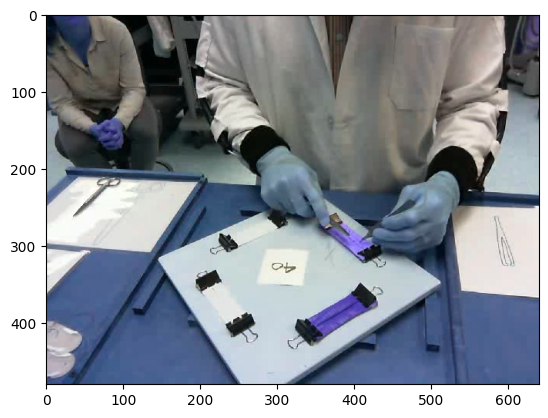

In [95]:
plt.imshow(image)

In [99]:
for image_file_name in all_images:
    #imageObject = Image.open("images/train/"+image_file_name)
    image = cv2.imread("images/train/"+image_file_name)
    name = image_file_name[:-4]+".txt"
    try:
        with open("labels/train/"+name, "r") as f: #get classes
            text=f.readlines()
        print(text)
        label1 = int(text[0].split()[0])
        bbox1 = text[0].split()[1:]
        bbox1[0] = 1 - float(bbox1[0])
        
        label2 = int(text[1].split()[0])
        bbox2 = text[1].split()[1:]
        bbox2[0] = 1 - float(bbox2[0])
        print(labels[label1],labels[label2])
        label1_flip = dict_left_right[label1]
        count_labels[label1_flip] += 1
        label2_flip = dict_left_right[label2]
        count_labels[label2_flip] += 1
        print(label1_flip,label2_flip)
        image_fliped = cv2.flip(image, 1)
        #cv2.imwrite("images_fliped"+image_file_name[:-4]+"flipped.jpg")
        #plt.imshow(image)
    except Exception as e:
        pass
        
    break
    

['5 0.7397245957031251 0.5378531332291666 0.20338989515624997 0.228248639375\n', '2 0.518961857890625 0.4802259886458334 0.19406780953125002 0.2508474231250001\n']
Left_Forcep Right_Needle_drive
4 3


In [81]:
import numpy as np
import bbox_visualizer as bbv
def add_bboxes_to_img(im,boxes):
    """
    gets image and boxes( in the format [label_index, xcenter, ycenter, w, h] )
    and draws the boxes in the image
    Args:
        im (_type_): _description_
        boxes (_type_): _description_

    Returns:
        _type_: _description_
    """
    y,x,_ =im.shape
    boxes=create_boxes((y,x),boxes)
    bboxes=list(map(lambda x: x[1:],boxes))
    im = bbv.draw_multiple_rectangles(im, bboxes,bbox_color=(255,0,0))
    return im

def create_boxes(shape,boxes):
    """
    gets shape(y,x) and boxes( in the format [label_index, xcenter, ycenter, w, h] )

    and returns  boxes [label_index, xmin, ymin, xmax, ymax]
    """
    bboxes=[]
    y,x =shape
    for label_index, xcenter, ycenter, w, h in boxes:
        w=w*x
        h=h*y
        xcenter=x*xcenter
        ycenter=y*ycenter
        # bbox = [xmin, ymin, xmax, ymax]
        bboxes.append([label_index,int(xcenter-w/2), int(ycenter-h/2), int(xcenter+w/2), int(ycenter+h/2)])
    return bboxes

def add_bboxes_with_labels_to_img(im,boxes,labels_name):
    """
    gets image and boxes list of box( in the format [label_index, xmin, ymin, xmax, ymax]) and labels_names 

    and return's image with the boxes and the label_name
    """
    bboxes=list(map(lambda x: x[1:],boxes))
    labels=list(map(lambda x: labels_name[x[0]],boxes))
    im = bbv.draw_multiple_rectangles(im, bboxes,bbox_color=(255,0,0))
    im=bbv.add_multiple_labels(im, labels, bboxes,text_bg_color=(255,0,0))
    return im

def draw_bboxes(im,boxes,labels_name):
    """
    gets image and boxes list of box( in the format [label_index, xcenter, ycenter, w, h]) and labels_names 

    return's image with the boxes and the label_name
    """
    boxes=create_boxes(im.shape[:2],boxes)# pixelize boxes
    return add_bboxes_with_labels_to_img(im,boxes,labels_name)

In [100]:
bbox1 = [float(x) for x in bbox1]
bbox2 = [float(x) for x in bbox2]

In [101]:
first = [label1_flip]
first += bbox1
second = [label2_flip]
second += bbox2

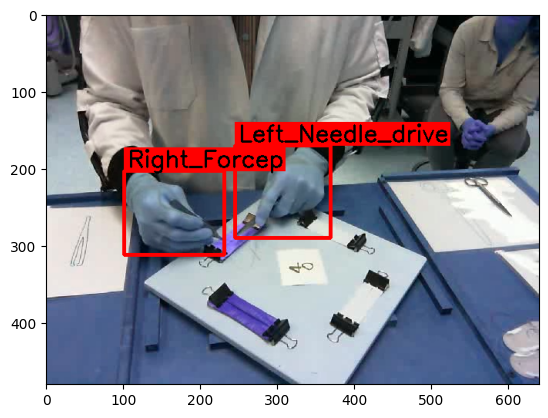

In [102]:
plt.imshow(draw_bboxes(image_fliped,[first,second],labels))

In [77]:
count_labels

{2: 561, 5: 255, 0: 185, 3: 561, 7: 563, 6: 563, 1: 185, 4: 255}